# Navigation via DQN

---

## Training of a DQN agent playing "Banana" environment

### Initializing environment

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import tensorflow as tf
import importlib
import sys
import matplotlib.pyplot as plt
import tqdm
from collections import namedtuple, deque
import random

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Creating agent

In [2]:
from dqn_agent import Agent
from model import QNetworkTf

In [3]:
class ReinforcementNetwork(QNetworkTf):
    def _inference(self):
        with tf.variable_scope("inference_"+self.name):
            layer = tf.layers.dense(self.input, 128, activation=tf.nn.relu)
            layer = tf.layers.dense(layer, 128, activation=tf.nn.relu)
#             layer = tf.layers.dense(layer, 256, activation=tf.nn.relu)
#             layer = tf.layers.dense(layer, 128, activation=tf.nn.relu)
#             layer = tf.layers.dense(layer, 64, activation=tf.nn.relu)
#             layer = tf.layers.dense(layer, 128, activation=tf.nn.relu)
#             layer = tf.layers.dense(layer, 64, activation=tf.nn.relu)
            output = tf.layers.dense(layer, 4)
        return output

In [4]:
env = UnityEnvironment(file_name = "data/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0 
reward = None
done = False

In [6]:
dqn_agent = Agent(ReinforcementNetwork, 37, 4, 42)

In [7]:
#todo: incorporate epsilon into agent
def run(agent, env, num_episodes=20000, mode='train'):
    """Run agent in given reinforcement learning environment and return scores."""
    scores = []
    max_avg_score = -np.inf
    train_mode=True
    agent.set_epsilon(1.0, 0.01, 0.8*num_episodes)
# 
    if mode=='test':
#         num_episodes = 1
        train_mode=False
        
    with tqdm.trange(1, num_episodes+1) as t:
        for i_episode in t:
            last_state = None
            last_action = None
            state = env.reset(train_mode=train_mode)[brain_name].vector_observations[0] 

            total_reward = 0
            done = False
            action = agent.act(state)
            
            while not done:
                env_info = env.step([action])[brain_name]
                state = env_info.vector_observations[0]   
                reward = env_info.rewards[0]
                done = env_info.local_done[0]

                total_reward += reward
                
                if last_state is not None:
                    agent.step(last_state, last_action, reward, state, done)
                action = agent.act(state, mode)
                
                last_state = state
                last_action = action
                
            scores.append(total_reward)
            agent.reset_episode()
            
            if mode == 'train':
                if i_episode>100:
                    mn = np.mean(scores[:-100])
                else:
                    mn = 0
                t.set_postfix(max_score=np.max(scores), loss=agent.loss, mean_score=mn)
                agent.loss = 0
                agent.learning_steps = 0
#                 if mn>3:
#                     print(f"Achieved mean 3.0 in {i_episode} episodes")
#                     break
    return scores

scores = run(dqn_agent, env, num_episodes=2000, mode='train')

 25%|████████▎                        | 501/2000 [08:57<26:48,  1.07s/it, loss=1.06e+11, max_score=22, mean_score=1.91]D:\Projekty\Current\Python\ReinforcementLearning\deep-reinforcement-learning\p1_navigation\dqn_agent.py:201: RuntimeWarning: invalid value encountered in less
  experiences = np.random.choice(length, size=self.batch_size, p=probs)
100%|█████████████████████████████████████| 2000/2000 [35:00<00:00,  1.05s/it, loss=nan, max_score=22, mean_score=1.01]


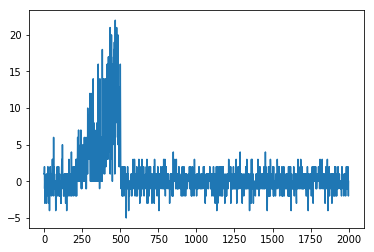

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]D:\Projekty\Current\Python\ReinforcementLearning\deep-reinforcement-learning\p1_navigation\dqn_agent.py:201: RuntimeWarning: invalid value encountered in less
  experiences = np.random.choice(length, size=self.batch_size, p=probs)
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:56<00:00, 56.40s/it]


[0.0]

In [8]:
plt.plot(scores)
plt.show()
run(dqn_agent, env, num_episodes=1, mode='test')

In [ ]:
dqn_agent.saver.save(dqn_agent.sess, "models/model.ckpt") 